Beobachteter Chi-Quadrat-Wert: 2.029
p-Wert (Simulation (100000 Simulationen): 0.1821


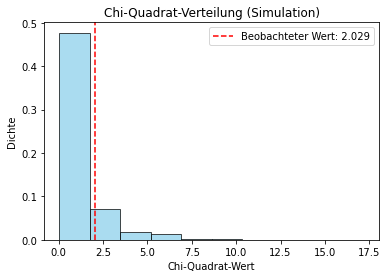

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Beobachtete Tabelle
observed = np.array([[32, 23],
                     [7, 11]])

# Berechne die Randwerte
row_sums = observed.sum(axis=1)  # Zeilensummen
col_sums = observed.sum(axis=0)  # Spaltensummen
total = observed.sum()           # Gesamtsumme

# Erwartete Häufigkeiten berechnen
expected = np.outer(row_sums, col_sums) / total

# Funktion zum Chi-Quadrat-Wert
def chi_squared_stat(observed, expected):
    return np.sum((observed - expected)**2 / expected)

# Monte-Carlo-Simulation
def simulate_chi_squared(observed, n_simulations=10000):
    row_sums = observed.sum(axis=1)
    col_sums = observed.sum(axis=0)
    total = observed.sum()
    
    chi_squared_values = []
    
    for _ in range(n_simulations):
        # Erzeuge eine zufällige Tabelle mit denselben Randwerten
        # (Hypergeometrische Verteilung)
        simulated_table = np.zeros((2, 2))
        simulated_table[0, 0] = np.random.hypergeometric(
            col_sums[0],  # "Erfolg" außerhalb der ersten Spalte
            col_sums[1],  # "Erfolg" außerhalb der zweiten Spalte
            row_sums[0]   # Stichprobenumfang für die erste Zeile
        )
        simulated_table[0, 1] = row_sums[0] - simulated_table[0, 0]
        simulated_table[1, 0] = col_sums[0] - simulated_table[0, 0]
        simulated_table[1, 1] = col_sums[1] - simulated_table[0, 1]
        
        # Erwartete Werte berechnen
        simulated_expected = np.outer(row_sums, col_sums) / total
        
        # Chi-Quadrat-Wert berechnen
        chi_squared_values.append(chi_squared_stat(simulated_table, simulated_expected))
    
    return chi_squared_values

# Simulation durchführen
n_simulations = 100000
simulated_chi_squared = simulate_chi_squared(observed, n_simulations)

# Beobachteten Chi-Quadrat-Wert berechnen
observed_chi_squared = chi_squared_stat(observed, expected)

# p-Wert aus der Simulation berechnen
p_value_simulation = np.mean(np.array(simulated_chi_squared) >= observed_chi_squared)

# Ergebnisse

print(f"Beobachteter Chi-Quadrat-Wert: {observed_chi_squared:.3f}")
print(f"p-Wert (Simulation ({n_simulations} Simulationen): {p_value_simulation:.4f}")

# Visualisierung der Chi-Quadrat-Verteilung aus der Simulation
plt.hist(simulated_chi_squared, bins=10, color="skyblue", edgecolor="black",density=True, alpha=0.7)
plt.axvline(observed_chi_squared, color="red", linestyle="--", label=f"Beobachteter Wert: {observed_chi_squared:.3f}")
plt.title("Chi-Quadrat-Verteilung (Simulation)")
plt.xlabel("Chi-Quadrat-Wert")
plt.ylabel("Dichte")
plt.legend()
plt.show()